In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('Date_Fruit_Datasets.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
# Describe the dataset
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
# Check and display the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows (if any)
if num_duplicates > 0:
    print("Duplicate Rows:")
    print(df[df.duplicated()])

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

# If no missing values
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")

Number of duplicate rows: 0
Missing values per column:
Series([], dtype: int64)
There are no missing values in the dataset.


<Axes: xlabel='Class', ylabel='Count'>

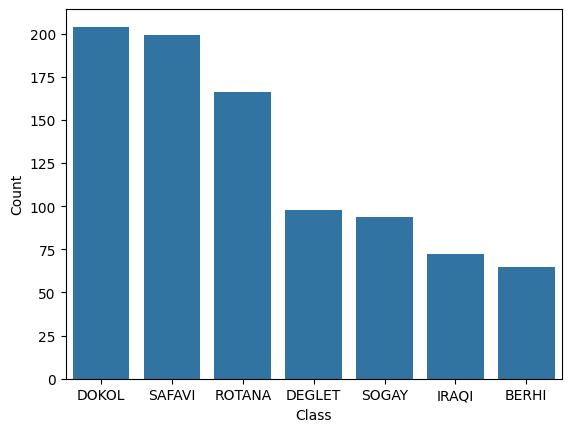

In [6]:
# Calculate the number of elements in each category in the 'Class' column
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

sns.barplot(x='Class', y='Count', data=class_counts)

Use markdown to comment on how well balanced the dataset is.

In [7]:
# Move the labels into a separate DataFrame
class_labels = df['Class']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Class' column
class_labels_encoded = label_encoder.fit_transform(class_labels)

# Update the original DataFrame with the encoded labels
df['Class'] = class_labels_encoded

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [8]:
# Extract the 'Class_encoded' column and reshape it into a 2D array
class_labels_2d = class_labels_encoded.reshape(-1, 1)

# Display the 2D array
print("Labels as a 2D array:")
print(class_labels_2d)

Labels as a 2D array:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2

Below is the mapping of labels to integer values:

- **BERHI**: 0
- **DEGLET**: 1
- **DOKOL**: 2
- **IRAQI**: 3
- **ROTANA**: 4
- **SAFAVI**: 5
- **SOGAY**: 6

In [9]:
# Separate features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.77227446, 0.77207865, 0.56560444, ..., 0.67351302, 0.55053709,
        0.4946647 ],
       [0.61783464, 0.61747978, 0.43690403, ..., 0.53892305, 0.51634149,
        0.49450116],
       [0.96467405, 0.9133745 , 0.6817325 , ..., 0.77796738, 0.61978216,
        0.57350706],
       ...,
       [0.46380101, 0.53411457, 0.46362467, ..., 0.44774729, 0.32417389,
        0.36261751],
       [0.43554209, 0.52334284, 0.42881001, ..., 0.55750041, 0.40280492,
        0.45206697],
       [0.62823025, 0.72490601, 0.5497979 , ..., 0.4974535 , 0.29056351,
        0.33754565]])

In [10]:
# Split the dataset into training (60%), testing (20%), and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Display the shapes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 538 samples
Validation set size: 180 samples
Testing set size: 180 samples


In [11]:
# Define a fully connected neural network model
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  
    layers.Dense(1000, activation='relu'),  
    layers.Dense(120, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with units equal to number of classes
])

optimizer = tf.keras.optimizers.Adam(0.001)

In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              35000     
                                                                 
 dense_1 (Dense)             (None, 120)               120120    
                                                                 
 dense_2 (Dense)             (None, 7)                 847       
                                                                 
Total params: 155,967
Trainable params: 155,967
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Convert labels to one-hot encoded format
y_train_model1 = to_categorical(y_train)
y_val_model1 = to_categorical(y_val)
y_test_model1 = to_categorical(y_test)

# Train the model
model1 = model.fit(
    X_train, y_train_model1,
    validation_data=(X_val, y_val_model1),
    epochs=20,  # Adjust the number of epochs as needed
    batch_size=32,
    verbose=1
)


Epoch 1/20
17/17 [==============================] - 3s 92ms/step - loss: 1.5200 - accuracy: 0.5372 - val_loss: 1.1886 - val_accuracy: 0.6278
Epoch 2/20
17/17 [==============================] - 1s 44ms/step - loss: 0.9606 - accuracy: 0.6506 - val_loss: 0.8046 - val_accuracy: 0.6778
Epoch 3/20
17/17 [==============================] - 1s 51ms/step - loss: 0.7134 - accuracy: 0.7342 - val_loss: 0.6487 - val_accuracy: 0.8278
Epoch 4/20
17/17 [==============================] - 1s 53ms/step - loss: 0.5845 - accuracy: 0.7807 - val_loss: 0.5606 - val_accuracy: 0.8444
Epoch 5/20
17/17 [==============================] - 1s 34ms/step - loss: 0.4980 - accuracy: 0.8141 - val_loss: 0.5404 - val_accuracy: 0.8611
Epoch 6/20
17/17 [==============================] - 1s 42ms/step - loss: 0.4466 - accuracy: 0.8401 - val_loss: 0.5142 - val_accuracy: 0.8444
Epoch 7/20
17/17 [==============================] - 1s 57ms/step - loss: 0.4451 - accuracy: 0.8271 - val_loss: 0.4861 - val_accuracy: 0.8500
Epoch 8/20
17

In [14]:
# Convert labels to one-hot encoded format
y_train_model2 = to_categorical(y_train)
y_val_model2 = to_categorical(y_val)
y_test_model2 = to_categorical(y_test)

# Train the model
model2 = model.fit(
    X_train, y_train_model2,
    validation_data=(X_val, y_val_model2),
    epochs=40,  # Adjust the number of epochs as needed
    batch_size=32,
    verbose=1
)

Epoch 1/40
17/17 [==============================] - 3s 165ms/step - loss: 0.2890 - accuracy: 0.8810 - val_loss: 0.3962 - val_accuracy: 0.8833
Epoch 2/40
17/17 [==============================] - 2s 94ms/step - loss: 0.2723 - accuracy: 0.8941 - val_loss: 0.4252 - val_accuracy: 0.8667
Epoch 3/40
17/17 [==============================] - 1s 59ms/step - loss: 0.2947 - accuracy: 0.8885 - val_loss: 0.3854 - val_accuracy: 0.9000
Epoch 4/40
17/17 [==============================] - 1s 51ms/step - loss: 0.2665 - accuracy: 0.9015 - val_loss: 0.3722 - val_accuracy: 0.9111
Epoch 5/40
17/17 [==============================] - 1s 45ms/step - loss: 0.2702 - accuracy: 0.8922 - val_loss: 0.4334 - val_accuracy: 0.8611
Epoch 6/40
17/17 [==============================] - 1s 61ms/step - loss: 0.2761 - accuracy: 0.8941 - val_loss: 0.5384 - val_accuracy: 0.8389
Epoch 7/40
17/17 [==============================] - 1s 80ms/step - loss: 0.2881 - accuracy: 0.8885 - val_loss: 0.4317 - val_accuracy: 0.8778
Epoch 8/40
1

In [15]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_model1)
print(f"Validation accuracy: {val_accuracy:.4f}")

6/6 [==============================] - 0s 6ms/step - loss: 0.4386 - accuracy: 0.8778
Validation accuracy: 0.8778


In [16]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_model2)
print(f"Validation accuracy: {val_accuracy:.4f}")

6/6 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8778
Validation accuracy: 0.8778


In [17]:
# Predict classes on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class indices

# Convert test labels to their original form
y_test_original = y_test.values

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

6/6 [==============================] - 0s 4ms/step
Confusion Matrix:
[[16  0  0  0  0  0  0]
 [ 0 19  0  0  1  0  1]
 [ 0  5 37  0  0  0  0]
 [ 0  0  0 14  2  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  5  0  0  2  0 10]]
